In [1]:
import random
from random import shuffle
from copy import copy
from math import sqrt
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

# Utilities

In [2]:
def distance(p1, p2):
    return sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [3]:
def total_distance(point_list):
    total = 0
    for i, _ in enumerate(point_list):
        if i == len(point_list) - 1 :
            total += distance(point_list[i], point_list[0])
            return total
        total += distance(point_list[i], point_list[i+1])
    return total

In [4]:
def init(area=(10,10), population_size=10):
    x = random.sample(range(0, area[0]), population_size)
    y = random.sample(range(0, area[1]), population_size)    
    return list(zip(x, y))

In [5]:
def get_xy(point_list):
    x = [i[0] for i in point_list]
    y = [i[1] for i in point_list]
    return x, y

In [6]:
def generate(point_list, size=2):
    generation = []
    to_shuffle = copy(point_list)
    
    for _ in range(size):
        to_shuffle = copy(point_list)
        shuffle(to_shuffle)
        generation.append(to_shuffle)
    
    return generation

In [7]:
def evaluate_generation(generation):
    evals = [(i, total_distance(i)) for i in generation]
    return sorted(evals, key=lambda x: x[1])

In [8]:
def mutate(point):
    point = copy(point)
    index1 = random.randint(0, len(point) - 1)
    index2 = random.randint(0, len(point) - 1)    

    point[index1], point[index2] = point[index2], point[index1]
    return point
    

In [9]:
def cross_over(generation):
    chro_size = len(generation[0]) 
        
    for i in range(len(generation)):
        selected = random.sample(generation, 2)
        crossed = selected[0][:chro_size//2] + selected[1][chro_size//2:]
        
        if len(set(crossed)) == chro_size:
            return crossed
        
    return None
    

In [10]:
def drop_evaluations(evals):
    points = []
    points += [i[0] for i in evals]
    return points

In [11]:
def generate_next(previous_generation):
    previous_generation_size = len(previous_generation)
    
    previous_generation = sorted(evaluate_generation(previous_generation), key=lambda x: x[1])
    previous_generation = drop_evaluations(previous_generation)
    
    survivors = previous_generation[:previous_generation_size//2]
    
    mutated = []
    for_mutation = random.sample(previous_generation, previous_generation_size//2)
    for i in for_mutation:
        mutated.append(mutate(i))
    
    crossed_over = []
    for _ in range(previous_generation_size//2):
        candidate = cross_over(previous_generation)
        if candidate is not None:
            crossed_over.append(candidate)
        
    newly_generated = mutated + crossed_over
    newly_generated = random.sample(newly_generated, previous_generation_size//2)
    
    
    next_generation = survivors + newly_generated
    
    size_loss = abs(len(next_generation) - len(previous_generation))
    extra = []
    if size_loss:
        next_generation =  next_generation + random.sample(previous_generation[previous_generation_size//2:], size_loss)
    return  next_generation

In [12]:
def evolve(first_generation, iteration_count, stop_after=100):
    log = []
    stock_counter = 0
    generation = copy(first_generation)

    for i in range(iteration_count):
        previous_min_distance = total_distance(generation[0])
        log.append(previous_min_distance)
        generation = generate_next(generation)
        current_min_distance = total_distance(generation[0])
        if previous_min_distance != current_min_distance:
            stock_counter = 0
        else:
            stock_counter += 1

        if stock_counter > 15000:
            break
    
    return log, generation

In [13]:
def display(area=(10,10) , chromosome_size=10, generation_size=10, iteration_count=100, stop_after=100):
    initial_chromosome = init(area, chromosome_size)
    generation = generate(initial_chromosome, generation_size)
    
    log, solutions = evolve(generation, iteration_count, stop_after)
    
    #show best solution:
    x, y = get_xy(solutions[0])
    plt.scatter(x, y, c="r")
    plt.plot(x, y, c="g")
    plt.plot((x[-1], x[0]), (y[-1], y[0]), c="y")
    plt.show()
    
    return log


In [14]:
def display_log(log):
    plt.plot(range(len(log)), log)
    plt.show()

# Tests

* area: 10x10
* chromosome size (number of cities):  10
* population of initial generation: 30
* number of iterations (generations): 100
* will stop after 100 generations without any improvement

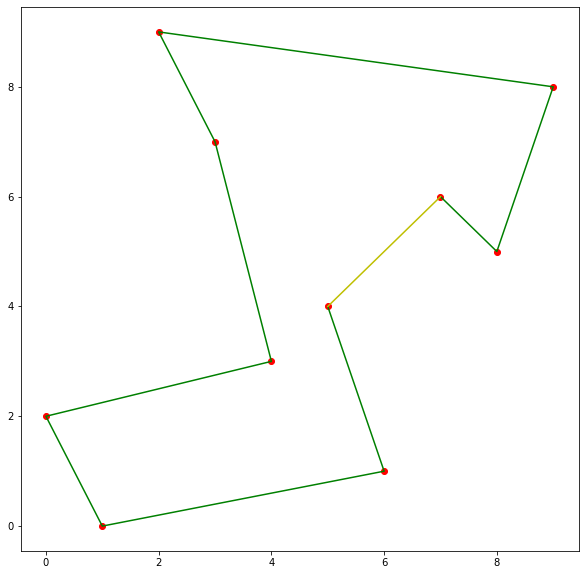

In [15]:
l1 = display((10, 10), 10, 30, 100, 100)

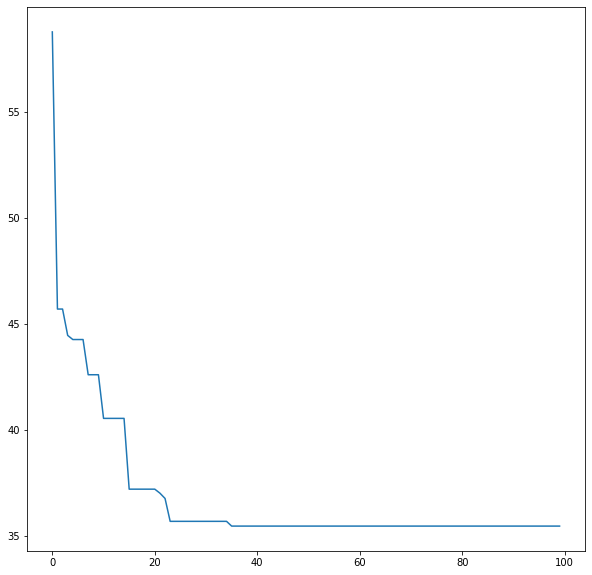

In [16]:
display_log(l1)

# Test2
* area: 20x20
* chromosome size (number of cities):  20
* population of initial generation: 90
* number of iterations (generations): 1000
* will stop after 500 generations without any improvement

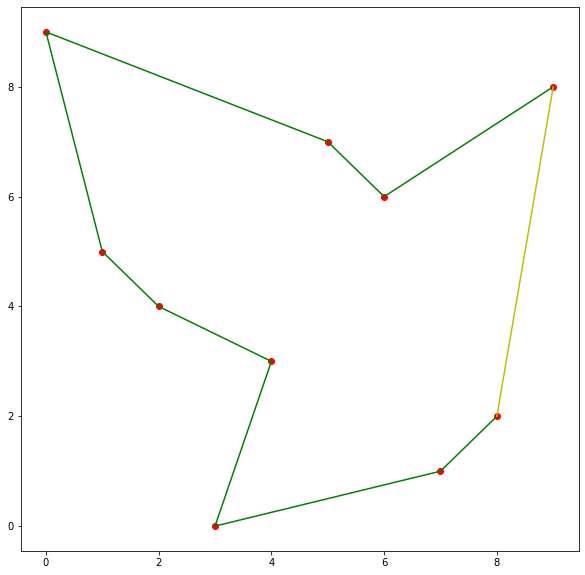

In [17]:
l2 = display((10, 10), 10, 30, 100, 100)

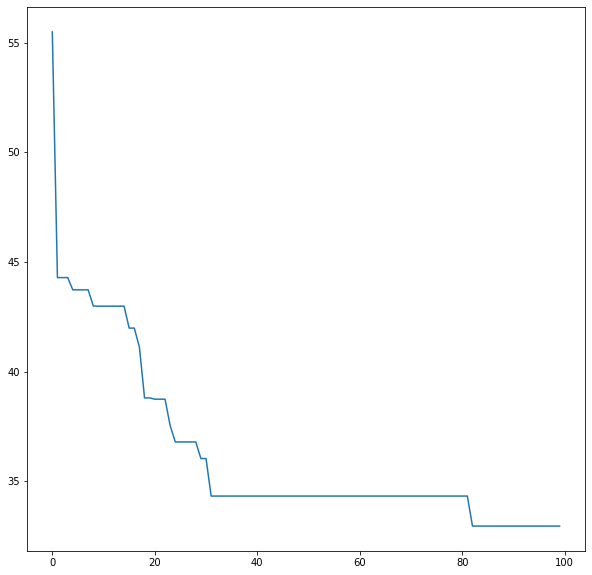

In [18]:
display_log(l2)